In [1]:
import os
os.environ["http_proxy"]="127.0.0.1:7890"
os.environ["https_proxy"]="127.0.0.1:7890"

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from IPython import display

class TrainingVisualizer:
    """在动画中绘制数据并记录每个类别的最高acc和最低loss"""
    def __init__(self, xlabel=None, ylabel=None, title=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(7, 5)):
        if legend is None:
            legend = []
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        self.config_axes = lambda: self.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
        self.legend = legend
        self.title = title  # 保存标题

        # 新增：记录每个类别的最高acc和最低loss
        self.best_acc = {key: float('-inf') for key in legend if 'acc' in key.lower()}
        self.min_loss = {key: float('inf') for key in legend if 'loss' in key.lower()}

    def set_axes(self, ax, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
        """设置matplotlib的轴"""
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        if xlim:
            ax.set_xlim(xlim)
        if ylim:
            ax.set_ylim(ylim)
        if legend:
            ax.legend(legend)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # 设置x轴刻度为整数
        ax.grid()
        
    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if self.X is None:
            self.X = [[] for _ in range(n)]
        if self.Y is None:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)

                # 更新每个类别的最高acc和最低loss
                label = self.legend[i].lower()
                if 'acc' in label:  # 检查是否是acc数据
                    if b > self.best_acc[self.legend[i]]:
                        self.best_acc[self.legend[i]] = b
                if 'loss' in label:  # 检查是否是loss数据
                    if b < self.min_loss[self.legend[i]]:
                        self.min_loss[self.legend[i]] = b

        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()

        # 显示每个类别的最高acc和最低loss
        title_text = self.title if self.title else ""
        for key in self.best_acc:
            title_text += f"\nBest {key}: {self.best_acc[key]:.4f}"
        for key in self.min_loss:
            title_text += f"\nMin {key}: {self.min_loss[key]:.4f}"
        
        self.axes[0].set_title(title_text)
        
        display.display(self.fig)
        display.clear_output(wait=True)

# 调用示例
# visualizer = TrainingVisualizer(xlabel='Epoch', ylabel='Value', title='Train TextRCNN', legend=['training_loss', "training_acc", "testing_loss", "testing_acc"]) # 初始化
# for epoch in range(num_epochs):
#     train_acc, train_loss = 
#     val_acc, val_loss = 
#     visualizer.add(epoch, [train_loss, train_acc, val_loss, val_acc])

In [3]:
import random
import time

## test 1

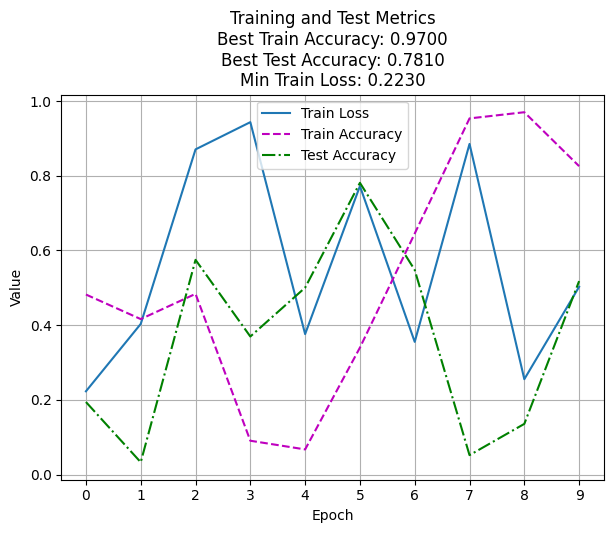

In [4]:
# 示例：如何使用扩展后的TrainingVisualizer类来设置不同数量的线条

# 初始化TrainingVisualizer对象，并设置标题和图例
visualizer = TrainingVisualizer(xlabel='Epoch', ylabel='Value', title='Training and Test Metrics',
                                legend=['Train Loss', 'Train Accuracy', 'Test Accuracy'])

# 模拟训练过程，在每个epoch结束时添加数据点并模拟时间延迟
for epoch in range(10):
    avg_train_loss = random.uniform(0, 1)
    train_accuracy = random.uniform(0, 1)
    test_accuracy = random.uniform(0, 1)
    visualizer.add(epoch, [avg_train_loss, train_accuracy, test_accuracy])
    time.sleep(1)  # 模拟每个epoch的训练时间为1秒

## test 2

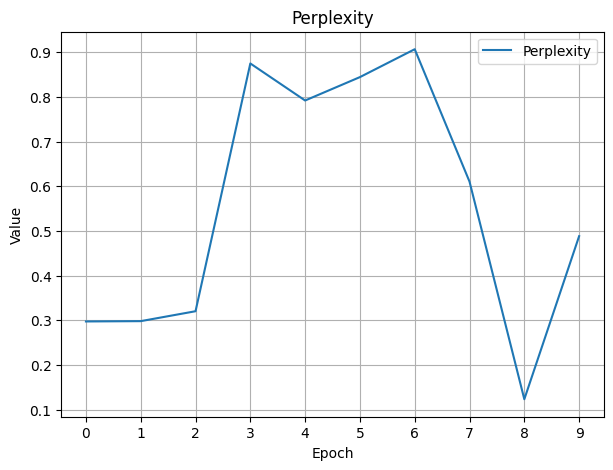

In [5]:
# 另一个示例：只绘制一条线
visualizer_single = TrainingVisualizer(xlabel='Epoch', ylabel='Value', title='Perplexity',
                                       legend=['Perplexity'])

# 模拟训练过程，在每个epoch结束时添加数据点并模拟时间延迟
for epoch in range(10):
    perplexity = random.uniform(0, 1)
    visualizer_single.add(epoch, (perplexity))
    time.sleep(1)  # 模拟每个epoch的训练时间为1秒